In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import Conv2D,concatenate,Lambda,Bidirectional,GRU
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K

In [2]:
def conv_block(x, n_filters, pool_size=(2, 2)):
    x = Conv2D(n_filters, (3, 3), strides=(1, 1), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=pool_size, strides=pool_size)(x)
    x = Dropout(0.25)(x)
    return x

In [3]:
# Model Definition
def create_model(input_shape, num_genres):
    inpt = Input(shape=input_shape)
    layer1=inpt#Input(shape=input_shape)
    x = conv_block(inpt, 16)
    x = conv_block(x, 32)
    x = conv_block(x, 64)
    x = conv_block(x, 128)
    x = conv_block(x, 256)
    
    
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    
    
    pool_lstm1 = MaxPooling2D((2,2), name = 'pool_lstm')(layer1)
    
    # Embedding layer

    squeezed = Lambda(lambda y: K.squeeze(y, axis= -1))(pool_lstm1)

    lstm = Bidirectional(GRU(64))(squeezed) 
    
    
    concat = concatenate([x, lstm], axis=-1, name ='concat')    
    
    
    
    x = Dense(512, activation='relu', 
              kernel_regularizer=tf.keras.regularizers.l2(0.02))(concat)
    x = Dropout(0.25)(x)
    predictions = Dense(num_genres, 
                        activation='softmax', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    
    model = Model(inputs=inpt, outputs=predictions)
    return model

In [4]:
model = create_model((128, 129, 1), 10)

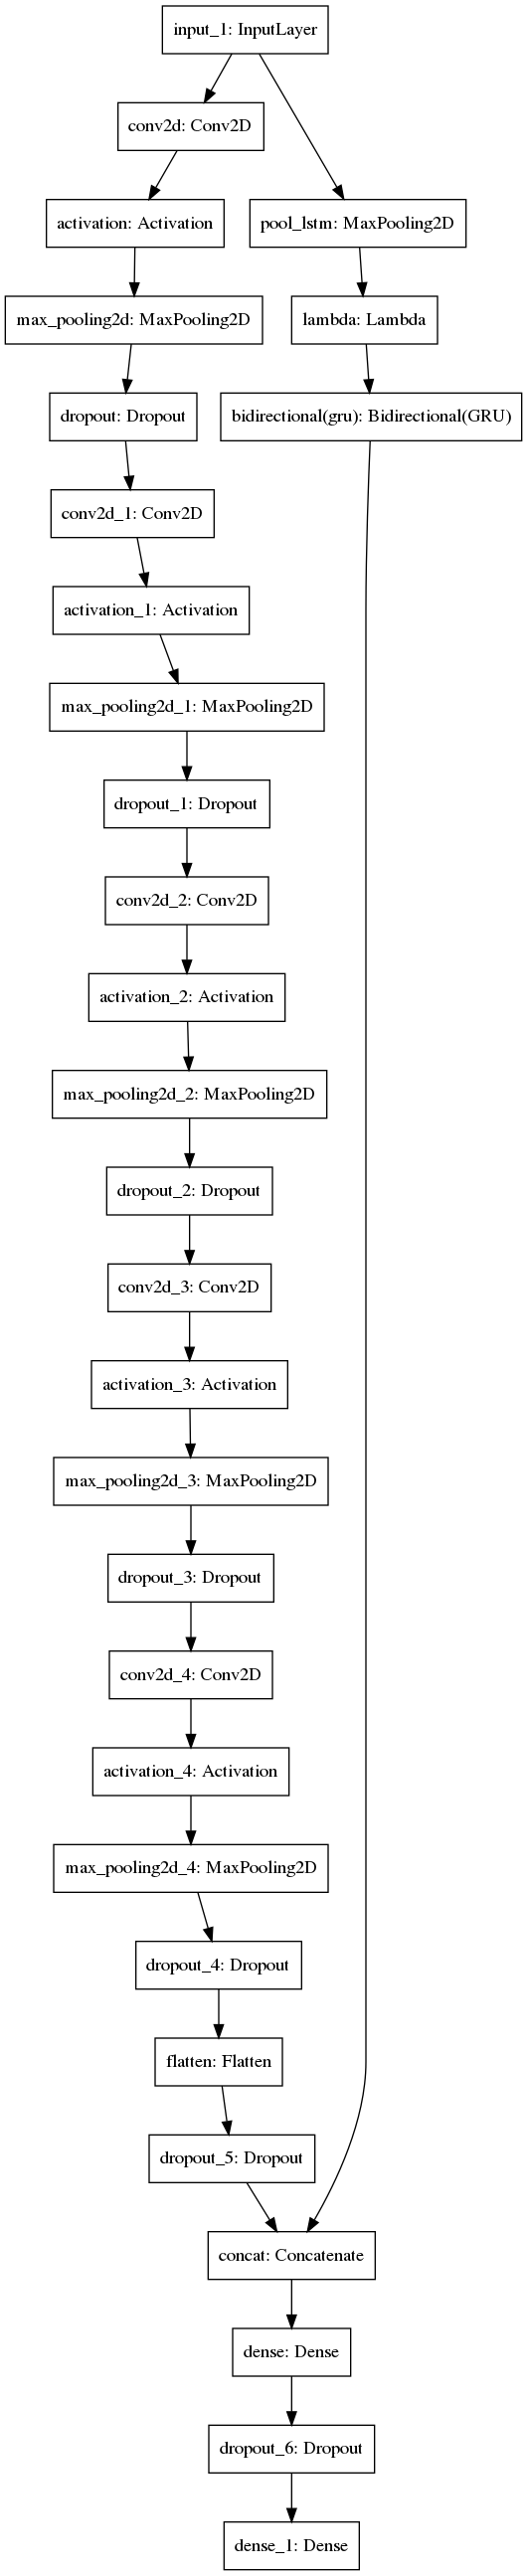

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [4]:
from tensorflow.keras.models import load_model

In [5]:
model = load_model('custom_cnn_2d.h5')#model = load_model()

In [6]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 129, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 129, 16)      160       
_________________________________________________________________
activation (Activation)      (None, 128, 129, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0     

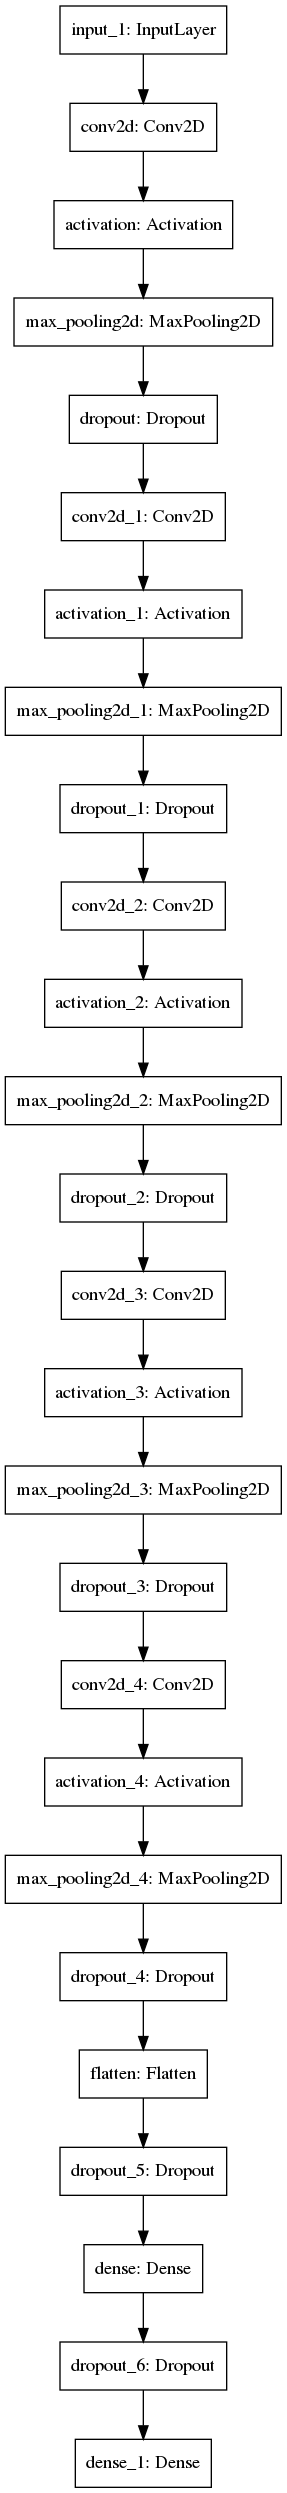

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_original.png')